In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
from collections import Counter
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ds = pd.read_csv('/content/drive/MyDrive/diabetes.csv', encoding='unicode_escape')
ds.head(10)

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<Axes: xlabel='BloodPressure', ylabel='BMI'>

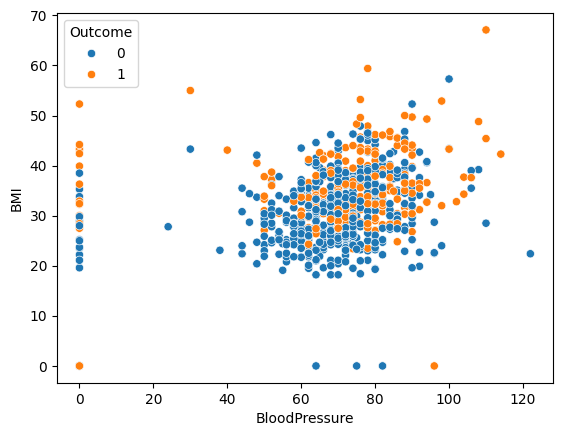

In [ ]:
sns.scatterplot(x=ds['BloodPressure'],y=ds['BMI'], hue=ds['Outcome'])

In [ ]:
# KNN Class Implementation
class KNN:
    def __init__(self, k):
        self.k = k

    # Fitting the model by storing training data
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # Predicting for the test data
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            distances = []
            votes = []

            # Step 1: Calculate distances between the current test point and all training points
            for j in range(len(self.X_train)):
                dist = distance.euclidean(self.X_train[j], X_test[i])  # Use self.X_train
                distances.append([dist, j])

            # Step 2: Sort by distance and select the K nearest neighbors
            distances.sort()  # Sorting the distances
            k_nearest = distances[:self.k]  # Pick the top k nearest distances

            # Step 3: Extract the labels of the k nearest neighbors
            for _, j in k_nearest:
                votes.append(self.y_train.iloc[j])  # Use iloc to access by position

            # Step 4: Determine the most common label (majority vote)
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)

        return final_output

    # Scoring the model
    def score(self, X_test, y_test):
        predictions = np.array(self.predict(X_test))
        return np.mean(predictions == y_test)


In [ ]:

##Usage of KNN algorithm

# Split dataset into features (X) and target (y)
X = ds.drop('Outcome', axis=1)
y = ds['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize KNN with k=3
knn = KNN(k=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


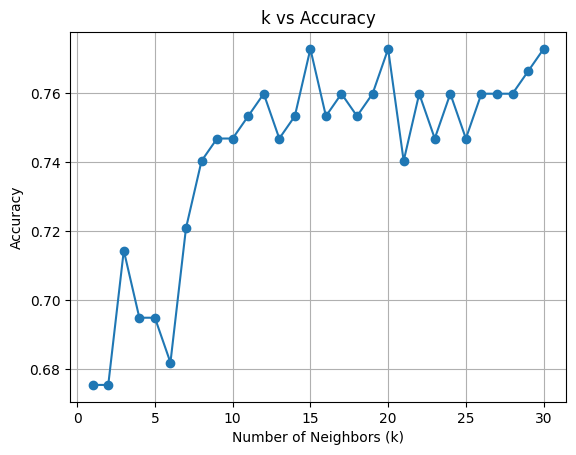

In [ ]:
# Plotting k vs accuracy
k_values = range(1, 31)
accuracies = []

# Loop through different values of k
for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot k vs accuracy
plt.plot(k_values, accuracies, marker='o')
plt.title('k vs Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()